<a href="https://colab.research.google.com/github/ceska68/Atividades/blob/main/Bastien_Liz%C3%A9_Master_Semana2_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [89]:
# Importando a biblioteca para criação de gráficos e visualizações
import matplotlib.pyplot as plt

# Importando a biblioteca para manipulação de vetores e matrizes numéricas
import numpy as np

# Importando a biblioteca para manipulação de dados em formato de tabela (dataframes)
import pandas as pd

# Importando a biblioteca para realização de testes estatísticos e cálculo de medidas descritivas
from scipy import stats

# Importando a biblioteca para realização de testes Post-hoc, como o teste de Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Importando a biblioteca para realizar o teste ANOVA One-Way
from scipy.stats import f_oneway

# Importando a biblioteca para realizar o teste t de Student pareado
from scipy.stats import ttest_rel

# Importando a biblioteca para realizar o teste t de Student independente
from scipy.stats import ttest_ind

# Importando a biblioteca para criação de gráficos estatísticos com alta qualidade visual
import seaborn as sns

# Importando a biblioteca para ajuste de modelos estatísticos e realização de testes de hipóteses. 
import statsmodels.api as sm

In [44]:
# Importar base Ideb
df_ideb = pd.read_csv('ideb.csv')

In [45]:
# Selecionar colunas
df_ideb = df_ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa' ,'ideb']]

In [46]:
#visualizar dados
df_ideb.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.80,2.4
1,2005,AC,53.9,167.8,165.60,2.3
2,2005,AC,49.3,151.8,149.60,1.8
3,2005,AC,48.8,163.6,155.80,1.9
4,2005,AC,48.8,159.0,153.39,1.9


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [47]:
# verificar quantidades de linhas e colunas
df_ideb.shape

(130194, 6)

In [48]:
# checar dados faltantes
df_ideb.isna().sum()

ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64

In [49]:
# deletar dados faltantes
df_ideb = df_ideb.dropna()

In [50]:
# checar dados faltantes
df_ideb.isna().sum()

ano                            0
sigla_uf                       0
taxa_aprovacao                 0
nota_saeb_matematica           0
nota_saeb_lingua_portuguesa    0
ideb                           0
dtype: int64

### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [53]:
# criar df com 2005
df_ideb_2005 = df_ideb.loc[df_ideb['ano'] == 2005,'taxa_aprovacao']

In [56]:
# visualizar dados
df_ideb_2005.head()

0    64.1
1    53.9
2    49.3
3    48.8
4    48.8
Name: taxa_aprovacao, dtype: float64

In [103]:
# fazer teste de hipotese
teste = stats.ttest_1samp(df_ideb_2005, 78)
# ver resultado
print(teste)

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)


Como o p-valor é menor que o nível de significância (<0.05), podemos rejeitar a hipótese nula, isto é, podemos afirmar com 95% de confiança que a taxa de aprovação não é igual a 78.

<Axes: >

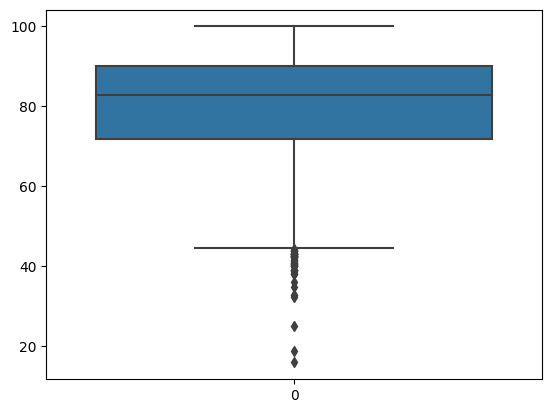

In [90]:
# boxplot para validar visualmente o resultado
sns.boxplot(data=df_ideb_2005)

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [94]:
# criar df com ano 2019
df_ideb_2019 = df_ideb[df_ideb['ano'] == 2019]

In [95]:
# criar df do RS com Ideb
df_ideb_RS = df_ideb_2019[df_ideb_2019['sigla_uf'] == 'RS']['ideb']
df_ideb_RS.head()

3836    7.5
3837    7.1
3838    7.3
3839    7.5
3840    8.0
Name: ideb, dtype: float64

In [96]:
# criar df do CE com Ideb
df_ideb_CE = df_ideb_2019[df_ideb_2019['sigla_uf'] == 'CE']['ideb']
df_ideb_CE.head()

3424    7.3
3425    7.3
3426    7.3
3427    7.3
3428    8.3
Name: ideb, dtype: float64

In [98]:
# realizar o teste t de duas amostras para médias não pareadas
teste_ind = ttest_ind(df_ideb_RS, df_ideb_CE, equal_var=False)

#visualizar resultado
print(teste_ind)

Ttest_indResult(statistic=-3.9541302761146584, pvalue=8.673400907588078e-05)


Como o p-valor é menor que o nível de significância (<0.05), podemos rejeitar a hipótese nula, isto é, podemos afirmar com 95% de confiança que a média de ideb do RS e do CE não são iguais.

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

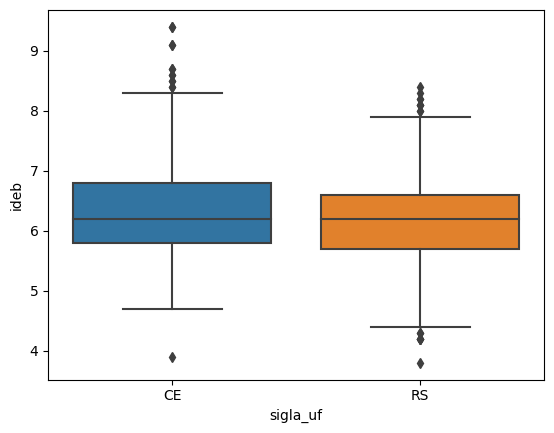

In [144]:
# criar boxplot
df_boxplot = df_ideb_2019[(df_ideb_2019['sigla_uf'] == 'RS') | (df_ideb_2019['sigla_uf'] == 'CE')]

sns.boxplot(x=df_boxplot['sigla_uf'], y=df_boxplot['ideb']);


### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [185]:
# criar df 2005 com 300 linhas
df_2005 = df_ideb.loc[df_ideb['ano'] == 2005].dropna().iloc[:300, ]

# visualizar dados
df_2005.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.80,2.4
1,2005,AC,53.9,167.8,165.60,2.3
2,2005,AC,49.3,151.8,149.60,1.8
3,2005,AC,48.8,163.6,155.80,1.9
4,2005,AC,48.8,159.0,153.39,1.9


In [186]:
# checar quantidade linhas
df_2005.shape

(300, 6)

In [187]:
# criar df 2019 com 300 linhas
df_2019 = df_ideb.loc[df_ideb['ano'] == 2019].dropna().iloc[:300, ]

# visualizar dados
df_2019.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
3409,2019,AC,98.2,288.92,263.10,8.1
3410,2019,AL,99.6,306.95,281.26,8.9
3411,2019,AL,99.6,306.95,281.26,8.9
3412,2019,AL,99.6,284.67,261.05,8.1
3413,2019,AL,99.6,284.67,261.05,8.1


In [188]:
# checar quantidade linhas
df_2019.shape

(300, 6)

In [189]:
# realizar o teste t de duas amostras para médias pareadas
teste_par = ttest_rel(df_2005['ideb'], df_2019['ideb'])

# Exibir o resultado
print(teste_par)

TtestResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295, df=299)


### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

In [190]:
# juntar base para boxplot
df_boxplot = pd.concat([df_2005, df_2019])
df_boxplot.head()


,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.80,2.4
1,2005,AC,53.9,167.8,165.60,2.3
2,2005,AC,49.3,151.8,149.60,1.8
3,2005,AC,48.8,163.6,155.80,1.9
4,2005,AC,48.8,159.0,153.39,1.9


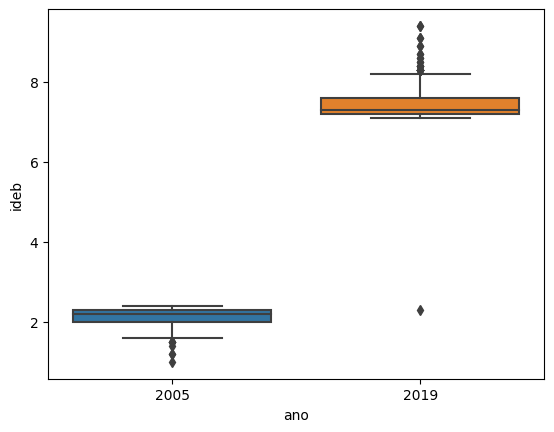

In [191]:
# criar boxplot
sns.boxplot(x=df_boxplot['ano'], y=df_boxplot['ideb']);

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [202]:
#filtrar 2019
df_2019 = df_ideb[df_ideb['ano'] == 2019].dropna()

In [205]:
# criar df PR
df_ideb_PR = df_2019[df_2019['sigla_uf'] == 'PR']

# Criar df SC
df_ideb_SC = df_2019[df_2019['sigla_uf'] == 'SC']

# Criar df RS
df_ideb_RS = df_2019[df_2019['sigla_uf'] == 'RS']

In [209]:
# teste ANOVA
f_oneway(df_ideb_PR['ideb'], df_ideb_SC['ideb'], df_ideb_RS['ideb'])

F_onewayResult(statistic=27.712354138245196, pvalue=1.2331589284254783e-12)

Como o p-valor é menor que o nível de significância (<0.05), podemos rejeitar a hipótese nula, isto é, podemos afirmar com 95% de confiança que a média de ideb dos 3 estados não podem ser consideradas iguais.

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

In [210]:
# juntar base para boxplot
df_boxplot_sul = pd.concat([df_ideb_PR, df_ideb_SC, df_ideb_RS])
df_boxplot_sul.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
3714,2019,PR,99.9,267.92,249.36,7.6
3715,2019,PR,99.9,267.92,249.36,7.6
3716,2019,PR,99.6,254.75,239.58,7.1
3717,2019,PR,99.6,254.75,239.58,7.1
3718,2019,PR,100.0,294.17,260.51,8.3


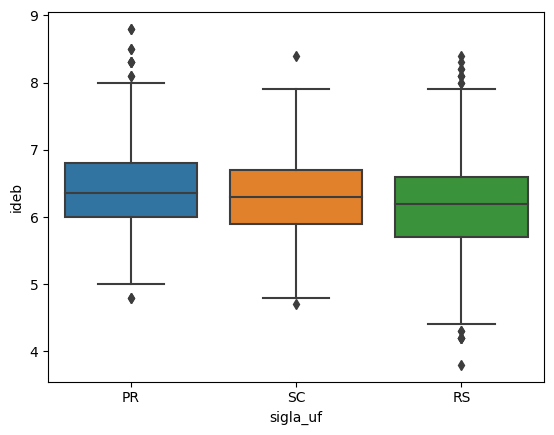

In [213]:
# criar boxplot
sns.boxplot(x=df_boxplot_sul['sigla_uf'], y=df_boxplot_sul['ideb']);

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [215]:
# ralizar o teste de Tukey
teste_tukey = pairwise_tukeyhsd(df_boxplot_sul['ideb'], df_boxplot_sul['sigla_uf'],alpha = 0.05)

# Exibir o resultado do teste de Tukey
print(teste_tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------


O teste rejeita as hipóteses que SC tem média igual aos outros estados.